In [3]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

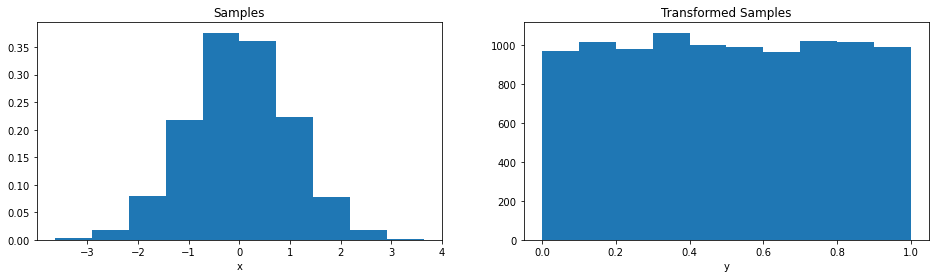

In [3]:
X = stats.norm.rvs(size=10000) #random variables sampleの略かな？
X_pit = stats.norm.cdf(X)

fig = plt.figure(figsize=(16,4))
fig.add_subplot(1,2,1) #1行2列の1番にaddする
plt.hist(X, density=True, bins=10) #density=Trueで相対度数になる
plt.title('Samples')
plt.xlabel('x')

fig.add_subplot(1,2,2)
plt.hist(X_pit, bins=10)
plt.title('Transformed Samples')
plt.xlabel('y')

plt.show()

In [1]:
from copulas.datasets import sample_bivariate_age_income

df = sample_bivariate_age_income()
df.head()

,age,income
0,48.935913,399.161393
1,39.234323,364.225531
2,55.659901,406.475105
3,31.810637,341.276022
4,65.342336,414.347815


<AxesSubplot:xlabel='age', ylabel='income'>

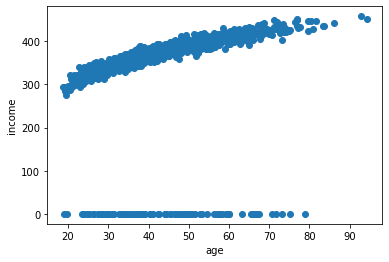

In [4]:
from copulas.visualization import scatter_2d

scatter_2d(df)

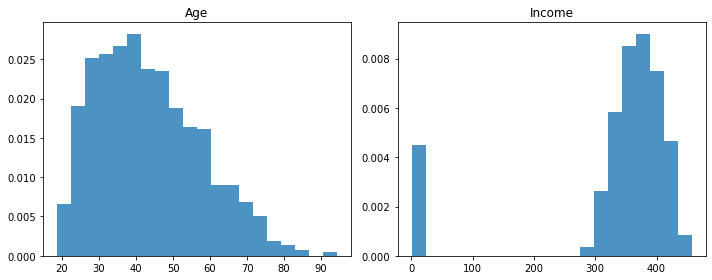

In [5]:
from copulas.visualization import hist_1d, side_by_side

side_by_side(hist_1d,{'Age': df['age'], 'Income': df['income']})

In [6]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()
copula.fit(df)

/Users/harasouichirou/miniforge3/envs/ds/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5001: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/harasouichirou/miniforge3/envs/ds/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/harasouichirou/miniforge3/envs/ds/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


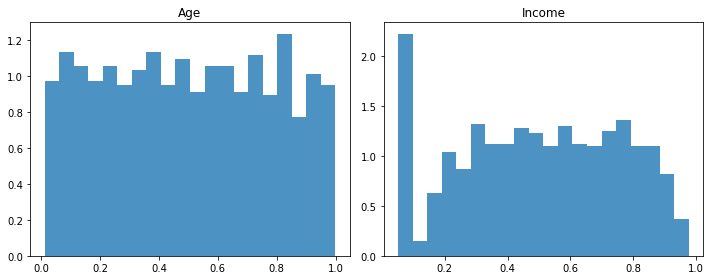

In [7]:
age_cdf = copula.univariates[0].cdf(df['age'])
inc_cdf = copula.univariates[1].cdf(df['income'])

side_by_side(hist_1d, {'Age': age_cdf, 'Income': inc_cdf})

In [8]:
synthetic = copula.sample(len(df))
synthetic.head()

,age,income
0,42.497860,403.868147
1,41.242046,21.759214
2,57.845125,365.002084
3,49.639904,393.914125
4,40.152088,376.240136


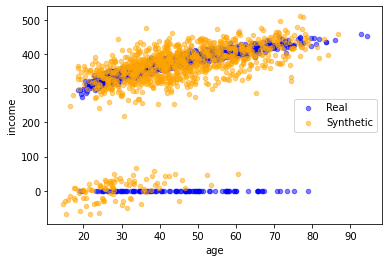

In [9]:
from copulas.visualization import compare_2d
compare_2d(df, synthetic)